In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from joblib import load
from datetime import datetime
import seaborn as sns
import pickle

In [129]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_path="../SavedPlot"):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if save_path:
        date_str = datetime.now().strftime("%Y-%m-%d")  # Get current date
        filename = f"{date_str}_{title}.png" if title else f"{date_str}_confusion_matrix.png"
        plt.savefig(f"{save_path}/{filename}")
        print(f"Confusion matrix saved to {save_path}/{filename}")

    plt.show()

<Axes: xlabel='fall_adl_bin', ylabel='count'>

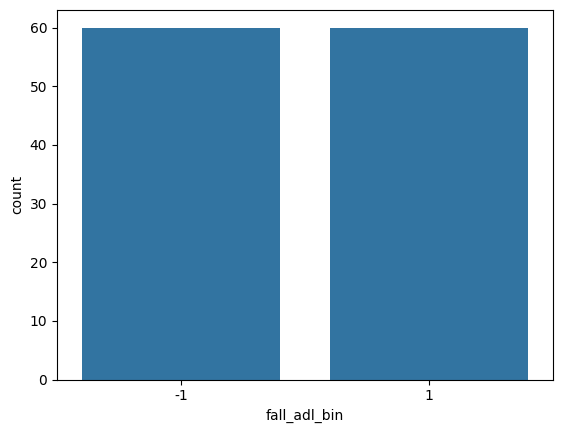

In [130]:
df = pd.read_csv("test_dataset_extract.csv")
df.head()
sns.countplot(x="fall_adl_bin", data=df)

In [131]:
df = df.drop(columns=['person_id'])
X_test = df.iloc[:, 1:-1]
y_test = df.iloc[:, -1]

In [132]:
X_test.head()

,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,var_acc_re_jerk,...,std_gyro_re_raw,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk
0,73.141465,13.749784,189.056572,14.542597,6.380235,35.552327,-28.373189,63.925516,8.054036,64.867498,...,1.392388,1.938744,1.866230,0.905071,4.170239,-5.537223,9.707462,0.876523,0.768292,0.205420
1,55.005627,9.171477,84.115993,8.739028,4.652327,19.697680,-13.809450,33.507130,3.951375,15.613368,...,1.557888,2.427014,3.054624,1.428002,0.820499,-1.353918,2.174417,0.319555,0.102115,0.113120
2,49.412640,9.421348,88.761803,12.428048,5.143550,32.332414,-24.386774,56.719189,6.058181,36.701560,...,1.136894,1.292528,1.706007,0.871282,1.220455,-4.003549,5.224004,0.671312,0.450660,0.203890
3,77.675360,12.166806,148.031172,9.247789,4.689134,45.733324,-30.028986,75.762309,8.865238,78.592438,...,1.250721,1.564302,1.916007,1.034652,1.825079,-1.872513,3.697592,0.524135,0.274718,0.213132
4,66.138342,12.910763,166.687808,10.235427,4.917747,56.757569,-41.543010,98.300579,10.006820,100.136453,...,1.488586,2.215887,2.451022,1.392182,1.715111,-2.607230,4.322342,0.623369,0.388588,0.245187


2. Apply saved decision tree model

In [133]:
path = './decision-tree-rf-model'
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])


In [134]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])

In [135]:
y_test_pred = model.predict(X_test)

Confusion matrix saved to ../SavedPlot/2025-01-03_Test Set Confusion Matrix on New Validated Decision Tree Model.png


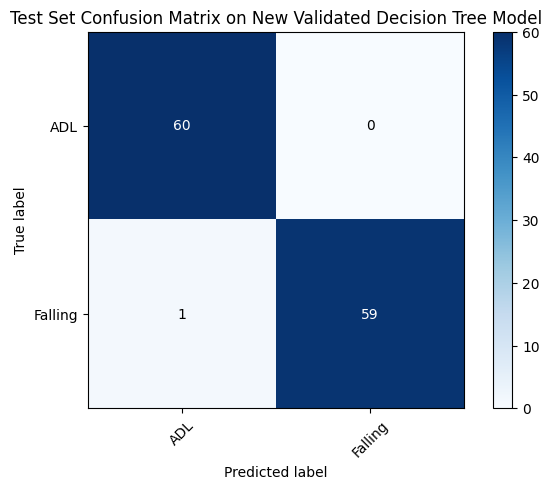

In [136]:
label_names = ['ADL', 'Falling']
title='Test Set Confusion Matrix on New Validated Decision Tree Model'
plot_confusion_matrix(y_test, y_test_pred, label_names, title=title)

In [137]:
classification_report(y_test, y_test_pred, target_names=label_names, output_dict=True)

{'ADL': {'precision': 0.9836065573770492,
  'recall': 1.0,
  'f1-score': 0.9917355371900827,
  'support': 60.0},
 'Falling': {'precision': 1.0,
  'recall': 0.9833333333333333,
  'f1-score': 0.9915966386554622,
  'support': 60.0},
 'accuracy': 0.9916666666666667,
 'macro avg': {'precision': 0.9918032786885246,
  'recall': 0.9916666666666667,
  'f1-score': 0.9916660879227724,
  'support': 120.0},
 'weighted avg': {'precision': 0.9918032786885246,
  'recall': 0.9916666666666667,
  'f1-score': 0.9916660879227724,
  'support': 120.0}}